# Machine Learning
## Tarea
Problema de regresión: hay que predecir el precio del airbnb utilizando los datos disponibles obtenidos a partir de este [enlace](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets). Para la realización de de la práctica se han seguido los siguientes pasos:

* Carga de los datos y separación 80/20 de los datos para training y para test.
* Análisis exploración de los datos.
* Preprocesado y selección de características (busqueda de missings, codificación de variables categóricas, generación de nuevas características, normalización, etc)
* Ejecución de varios modelos de regresión y optimización de parámetros libres
* Validación de los modelos utilizados (comparandolos con el dataset de test)

## 1. División train/test

Lo primero que hacemos es generarnos nuestro subconjunto de datos de entrenamiento y de test. Los almacenamos en fichero para poder recuperarlos en otro momento, por lo tanto este paso solamente lo tenenemos que ejecutar la primera vez que realicemos la división. Las siguientes veces solamente tendremos que cargar los dos ficheros (__train.csv y test.csv__) almacenados en la carpeta __/data__.

Carga de librerias y opciones para la representación en el notebook.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-darkgrid')

import seaborn as sns

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

La división realizada es de __20%__ para test y __80%__ para training.

In [2]:
from sklearn.model_selection import train_test_split
full_df = pd.read_csv('./data/airbnb-listings.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos (descomentar si queremos volver a ejecutar)
#train.to_csv('./data/train.csv', sep=';', decimal='.', index=False)
#test.to_csv('./data/test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


## 2. Carga de los datasets de training y test

In [3]:
df_train = pd.read_csv('./data/train.csv', sep=';', decimal='.')
df_test = pd.read_csv('./data/test.csv', sep=';', decimal='.')
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


### Visualización

Realizamos una visualización rápida de los datos para ver si se carga correctamente y comprobar el tipo de variables que tenemos.

In [4]:
df_train.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,14347727,https://www.airbnb.com/rooms/14347727,20170407214119,2017-04-08,Habitación privada en apartamento,Alquilo habitación privada en apartamento al l...,NaN,Alquilo habitación privada en apartamento al l...,none,NaN,Cuando alquilo la habitación yo duermo en el s...,NaN,NaN,NaN,NaN,NaN,NaN,https://public.opendatasoft.com/api/v2/catalog...,NaN,22720373,https://www.airbnb.com/users/show/22720373,Roberto,2014-10-19,"Madrid, Community of Madrid, Spain",NaN,within a few hours,100.0,NaN,https://a0.muscache.com/im/users/22720373/prof...,https://a0.muscache.com/im/users/22720373/prof...,NaN,2.0,2.0,"email,phone,facebook,google,reviews","Madrid, Comunidad de Madrid 28009, Spain",NaN,Ibiza,Retiro,Madrid,Comunidad de Madrid,28009,Madrid,"Madrid, Spain",ES,Spain,40.416072,-3.676333,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",NaN,40.0,NaN,NaN,200.0,NaN,1,0,1,1125,7 months ago,NaN,29,59,89,364,2017-04-08,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,2.0,NaN,"40.4160716559,-3.67633262485","Host Has Profile Pic,Requires License"
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",Hora llegada: a partir de las 15:00 horas Hora...,"Acceso a todos los medios de trasporte, BUS, M...",NaN,Estimado huésped estaremos disponible todo el ...,- Oír música con volumen moderado. Entrada a p...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/1565a3a9-2...,85301317,https://www.airbnb.com/users/show/85301317,Apartamentos Turísticos,2016-07-22,"Madrid, Community of Madrid, Spain",Somos una empresa de turismo dedicada al aloj...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/ff7ad016-4...,https://a0.muscache.com/im/pictures/ff7ad016-4...,NaN,1.0,1.0,"email,phone,reviews,jumio,offline_government_i...","Madrid, Comunidad de Madrid 28012, Spain",NaN,Sol,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.415802,-3.705340,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,50.0,NaN,NaN,NaN,15.0,1,0,1,1125,today,NaN,15,39,64,208,2017-04-08,20,2016-08-05,2017-03-20,91.0,9.0,9.0,10.0,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,3603750,https://www.airbnb.com/rooms/3603750,20170407214119,2017-04-08,Apartament

In [5]:
df_train.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.182400e+04,1.182400e+04,1.182400e+04,10325.000000,11821.000000,11821.000000,11824.000000,11824.000000,11824.000000,11779.000000,11806.000000,11789.000000,473.000000,11810.000000,2885.000000,2843.000000,5035.000000,6967.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,9173.000000,9152.000000,9158.000000,9149.000000,9157.000000,9146.000000,9146.000000,11822.000000,9293.000000
mean,1.025337e+07,2.017038e+13,3.607076e+07,94.800387,12.816513,12.816513,40.505313,-3.841815,3.276641,1.286442,1.346773,2.051065,384.454545,73.702794,375.997574,1404.816391,190.150745,32.152146,1.586181,7.639800,3.111806,964.132358,8.973275,22.990020,39.863836,202.482747,22.589394,91.687452,9.415210,9.324088,9.624549,9.649121,9.537284,9.214301,9.644815,1.868515
std,5.572031e+06,5.342712e+08,3.412718e+07,15.291262,34.722924,34.722924,4.596069,13.918228,2.106127,0.667359,0.909841,1.641454,618.742912,72.203846,194.620899,1111.662014,117.420048,32.030358,1.182357,12.490317,13.370049,9387.839981,9.345545,19.753682,29.658085,127.946375,37.874278,9.028574,0.925849,1.003331,0.803586,0.759505,0.763133,0.952104,23.872259,1.862982
min,1.986400e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.124429,1.000000,0.000000,0.000000,1.000000,0.000000,9.000000,70.000000,250.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.507211e+06,2.017041e+13,6.840576e+06,100.000000,1.000000,1.000000,40.409756,-3.707482,2.000000,1.000000,1.000000,1.000000,0.000000,34.000000,215.000000,701.000000,100.000000,15.000000,1.000000,0.000000,1.000000,365.000000,0.000000,4.000000,12.000000,78.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.460000
50%,1.129145e+07,2.017041e+13,2.484778e+07,100.000000,2.000000,2.000000,40.419325,-3.700770,3.000000,1.000000,1.000000,2.000000,97.000000,55.000000,350.000000,1200.000000,150.000000,25.000000,1.000000,0.000000,2.000000,1125.000000,6.000000,20.000000,38.000000,242.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.531810e+07,2.017041e+13,5.431423e+07,100.000000,6.000000,6.000000,40.430852,-3.683460,4.000000,1.000000,2.000000,2.000000,624.000000,87.000000,500.000000,1726.000000,200.000000,40.000000,2.000000,15.000000,3.000000,1125.000000,14.000000,38.000000,65.000000,319.000000,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,10.000000,16.000000,6997.000000,999.000000,999.000000,25000.000000,990.000000,662.000000,16.000000,500.000000,1125.000000,1000000.000000,30.000000,60.000000,90.000000,365.000000,356.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


Los datos se han cargado correctamente. Tenemos un dataset de __11824__ filas y __89__ variables. La variable a predecir es __*Price*__ y el resto serán las variables predictoras, entre las que podemos distinguir variables categóricas y analíticas. En una primera exploración podemos deshacernos de aquellas variables que sabemos que no van a aportar nada a nuestro modelo.

In [6]:
print(f'Las columnas son:')
print(df_train.columns.values)

Las columnas son:
['ID' 'Listing Url' 'Scrape ID' 'Last Scraped' 'Name' 'Summary' 'Space'
 'Description' 'Experiences Offered' 'Neighborhood Overview' 'Notes'
 'Transit' 'Access' 'Interaction' 'House Rules' 'Thumbnail Url'
 'Medium Url' 'Picture Url' 'XL Picture Url' 'Host ID' 'Host URL'
 'Host Name' 'Host Since' 'Host Location' 'Host About'
 'Host Response Time' 'Host Response Rate' 'Host Acceptance Rate'
 'Host Thumbnail Url' 'Host Picture Url' 'Host Neighbourhood'
 'Host Listings Count' 'Host Total Listings Count' 'Host Verifications'
 'Street' 'Neighbourhood' 'Neighbourhood Cleansed'
 'Neighbourhood Group Cleansed' 'City' 'State' 'Zipcode' 'Market'
 'Smart Location' 'Country Code' 'Country' 'Latitude' 'Longitude'
 'Property Type' 'Room Type' 'Accommodates' 'Bathrooms' 'Bedrooms' 'Beds'
 'Bed Type' 'Amenities' 'Square Feet' 'Price' 'Weekly Price'
 'Monthly Price' 'Security Deposit' 'Cleaning Fee' 'Guests Included'
 'Extra People' 'Minimum Nights' 'Maximum Nights' 'Calendar Updated'


Podemos descartar el ID. Scrape ID ya que no nos aportan nada de información. También descartaremos, de momento, otras columnas que consideramos que son poco relevantes o porque indican lo mismo que otra columna. De este modo, en una primera aproximación nos quedariamos con las diguientes variables a analizar:

In [7]:
columns_to_keep = ['Access','Host Total Listings Count','Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', \
                   'State', 'Zipcode', 'Country', 'Property Type', 'Room Type', \
                   'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type','Amenities', 'Square Feet', 'Price', \
                   'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', \
                   'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy', 'Calculated host listings count', \
                   'Reviews per Month','Features']
#columns_to_keep['Bathrooms','Bedrooms','Accomodates','Square Feet']
cols = len(columns_to_keep)
print(f'Número de columnas totales = {cols}')

Número de columnas totales = 29


Quedando como variables descartadas las siguientes:

In [8]:
columns_to_remove = list(set(df_train.columns.values) -  set(columns_to_keep))
print(f'Número de columnas a eliminar = {len(columns_to_remove)}')

Número de columnas a eliminar = 60


## 3. Análisis exploratorio y pre-procesado

En esta fase se analizará primero la variable a predecir (variable objetivo), y luego se analizarán las posibles variables predictoras, distinguiendo entre categóricas y analíticas. Se realizará la detección de duplicidades, missings y outliers y un análisis estadístico básico.

In [9]:
df_train = df_train[columns_to_keep]
df_train.shape

(11824, 29)

### Variables analíticas

Primero analizamos las variables analíticas y luego las categóricas

In [10]:
metric_columns=df_train.dtypes[(df_train.dtypes=="float64")|(df_train.dtypes=="int64")].index.values.tolist()
attributes_columns=df_train.dtypes[(df_train.dtypes!="float64")&(df_train.dtypes!="int64")].index.values.tolist()

In [11]:
df_train[metric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Host Total Listings Count,11821.0,12.816513,34.722924,0.00,1.00,2.0,6.00,519.00
Accommodates,11824.0,3.276641,2.106127,1.00,2.00,3.0,4.00,16.00
Bathrooms,11779.0,1.286442,0.667359,0.00,1.00,1.0,1.00,8.00
Bedrooms,11806.0,1.346773,0.909841,0.00,1.00,1.0,2.00,10.00
Beds,11789.0,2.051065,1.641454,1.00,1.00,2.0,2.00,16.00
Square Feet,473.0,384.454545,618.742912,0.00,0.00,97.0,624.00,6997.00
Price,11810.0,73.702794,72.203846,9.00,34.00,55.0,87.00,999.00
Security Deposit,5035.0,190.150745,117.420048,0.00,100.00,150.0,200.00,990.00
Cleaning Fee,6967.0,32.152146,32.030358,0.00,15.00,25.0,40.00,662.00
Guests Included,11824.0,1.586181,1.182357,1.00,1.00,1.0,2.00,16.00


Podemos representar los datos para entender mejor cada una de las variables. La variable objetivo __*Price*__ presenta los siguientes estadísticos:

In [12]:
df_train['Price'].describe().T

count    11810.000000
mean        73.702794
std         72.203846
min          9.000000
25%         34.000000
50%         55.000000
75%         87.000000
max        999.000000
Name: Price, dtype: float64

(53.0, -45.5, 166.5)

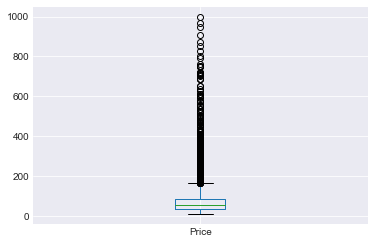

In [13]:
df_train['Price'].plot.box()

# Rango intercuartil
IQR=df_train['Price'].quantile(0.75)-df_train['Price'].quantile(0.25)
IQR, df_train['Price'].quantile(0.25) - 1.5*IQR, df_train['Price'].quantile(0.75) + 1.5*IQR

Podemos apreciar que hay una gran cantidad de datos que parecen outliers, pero esto depende de las naturaleza de los datos y puede que para esta distribución los "bigotes" del boxplot sean demasiado restrictivos. Por el momento no vamos a eliminar este tipo de outliers que se visualizan en el boxplot, ya que si hacemos esto nos podriamos quedar con muy pocos datos.

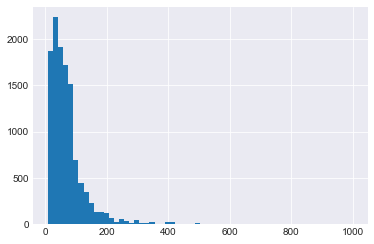

In [14]:
df_train['Price'].hist(log=False, density=False, bins= 60)

Como se puede apreciar en este caso la variable objetivo no sigue una distribución normal.

A continuación representamos los histogramas de las variables númericas para entender como se distribuyen y detectar posibles datos anómalos.

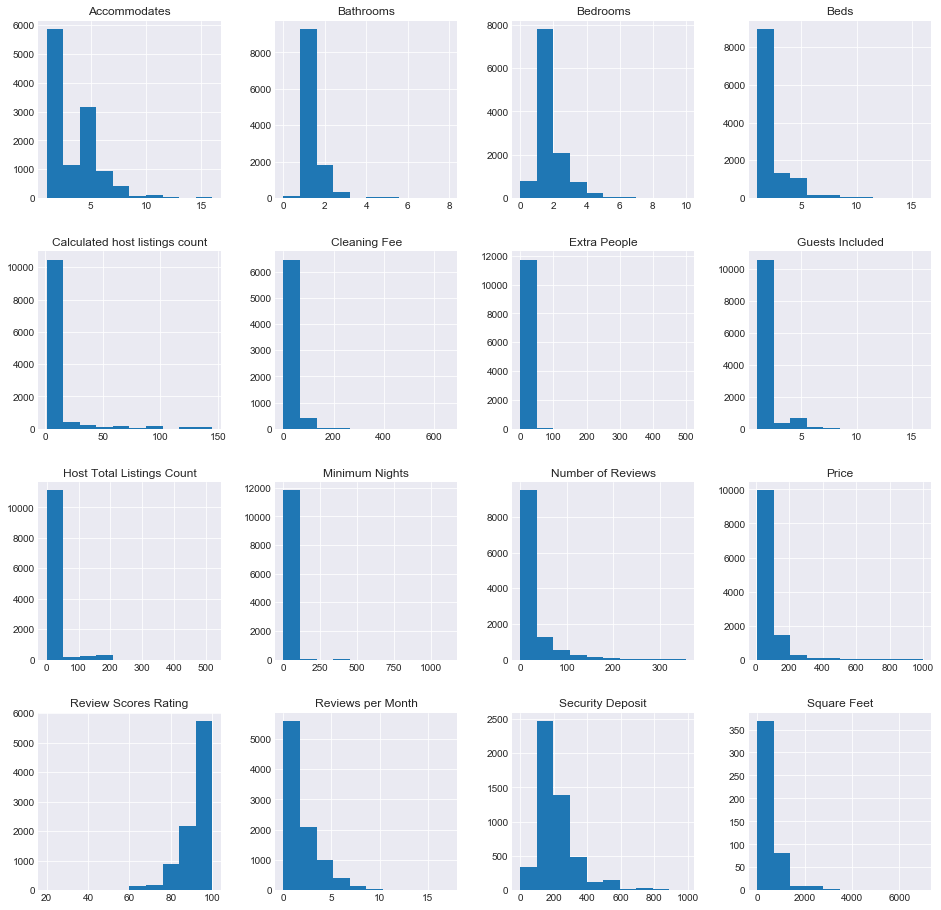

In [15]:
df_train[metric_columns].hist(figsize=[16,16])
#data.plot(kind='density', subplots=True, layout=(5,4), sharex=False, figsize=[16,16])
plt.show()

In [16]:
# para comprobar algun hist con mas detalle
#df_train['Price'].value_counts(dropna=False).sort_values()
#df_train['Price'].hist(range=(0,30))

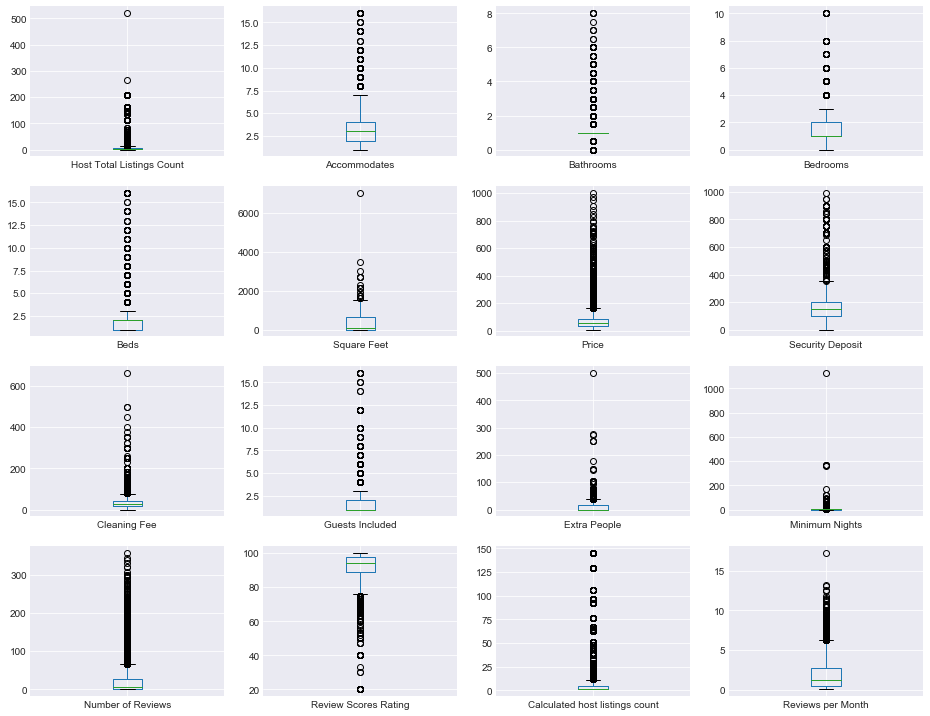

In [17]:
df_train.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False, figsize=[16,16])
plt.show()

No se aprecian errores significativos en la distribución de las variables que podamos eliminar. A continuación, también representamos la relación de las variables analíticas con la variable objetivo __*Precio*__, de esta forma podemos tener una idea de como se relacionan entre ellas y detectar también algún tipo de anomalía o relación.

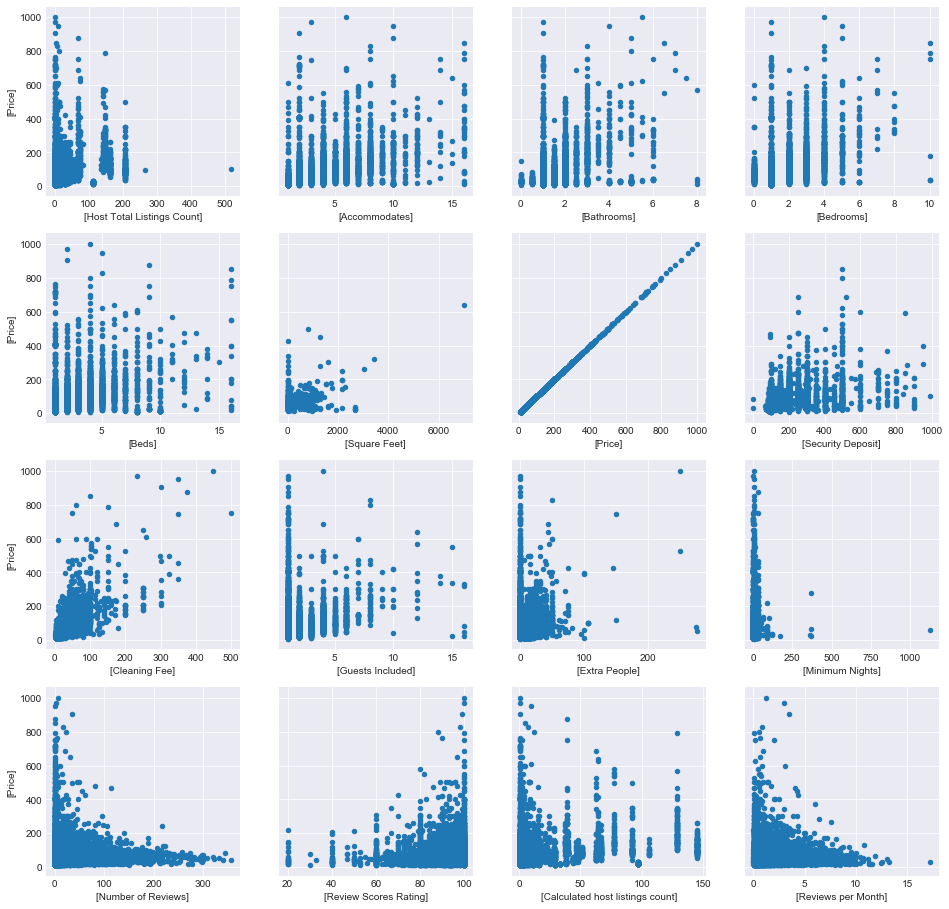

In [18]:
# entender las relaciones con la variable objetivo
fig, axes = plt.subplots(4,4, sharey=True, figsize=[16,16])
for i, col in enumerate(metric_columns):
    df_train.plot(x=[col], y=["Price"], kind="scatter", ax=axes[i // 4][i % 4])

plt.show()


### Correlación

Cuando tenemos una correlación significativa entre las variables predictoras  puede causar problemas en el modelo (problema de la multicolinealidad), y deberemos eliminar una de ella del modelo.

In [19]:
corr=df_train.corr()
corr

,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Calculated host listings count,Reviews per Month
Host Total Listings Count,1.000000,0.233368,0.232838,0.190554,0.178008,0.001925,0.229756,0.032019,0.245633,0.077854,0.009115,0.024614,-0.117782,-0.156204,0.919135,-0.153845
Accommodates,0.233368,1.000000,0.437952,0.726321,0.839092,0.349945,0.529636,0.185833,0.366320,0.568502,0.234058,0.007444,0.053366,-0.048232,0.263136,0.017366
Bathrooms,0.232838,0.437952,1.000000,0.527984,0.486836,0.442399,0.394525,0.209421,0.333657,0.248549,0.091625,0.029069,-0.079395,0.009145,0.287972,-0.091423
Bedrooms,0.190554,0.726321,0.527984,1.000000,0.731431,0.386752,0.506137,0.220309,0.374279,0.443088,0.135512,0.022592,-0.048126,0.010593,0.225990,-0.076477
Beds,0.178008,0.839092,0.486836,0.731431,1.000000,0.292993,0.445999,0.175607,0.332554,0.465258,0.170633,0.008587,0.010808,-0.035419,0.221197,-0.039475
Square Feet,0.001925,0.349945,0.442399,0.386752,0.292993,1.000000,0.377948,0.074893,0.149396,0.210949,0.113800,0.030392,-0.100822,0.017176,-0.012799,-0.099349
Price,0.229756,0.529636,0.394525,0.506137,0.445999,0.377948,1.000000,0.398342,0.684573,0.300139,0.125654,0.029466,-0.063124,0.064782,0.225320,-0.092596
Security Deposit,0.032019,0.185833,0.209421,0.220309,0.175607,0.074893,0.398342,1.000000,0.471454,0.084400,0.061922,0.116154,-0.117437,0.080403,0.026865,-0.146744
Cleaning Fee,0.245633,0.366320,0.333657,0.374279,0.332554,0.149396,0.684573,0.471454,1.000000,0.177675,0.207799,0.089851,-0.084369,0.017308,0.242221,-0.148496
Guests Included,0.077854,0.568502,0.248549,0.443088,0.465258,0.210949,0.300139,0.084400,0.177675,1.000000,0.328676,0.003735,0.096864,0.015959,0.102320,0.060129


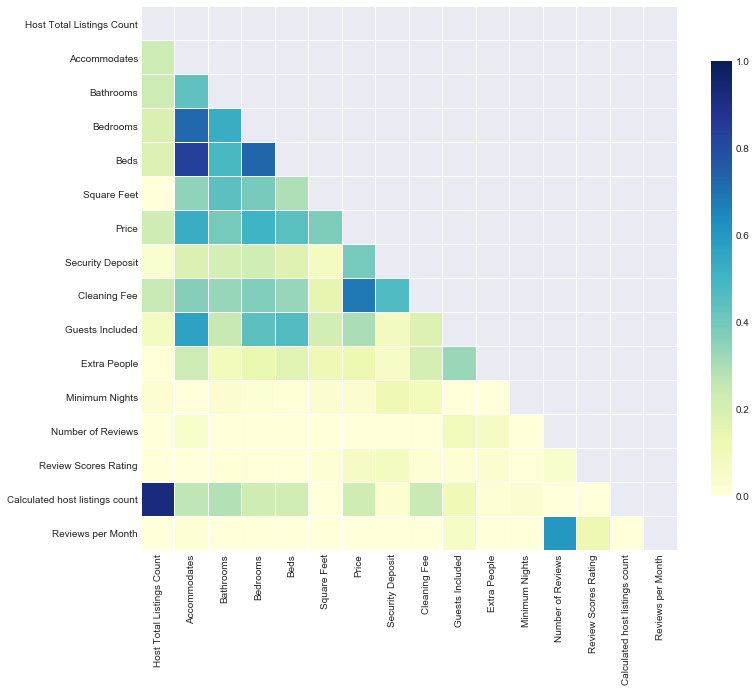

In [20]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Con el análisis de correrlación hemos visto que las variables __*Calculated Host Listings Count*__ y __*Host Total Listings Count*__  o __*Beds*__ y  __*Accomodates*__ estan muy correlacionadas por lo deberemos eliminar una del dataset.

In [21]:
new_columns_to_remove = ['Host Total Listings Count', 'Beds']

columns_to_remove.extend(new_columns_to_remove)
df_train.drop(new_columns_to_remove, axis=1, inplace=True)
df_train.shape

(11824, 27)

### Variables categoricas

Mediante tablas de frecuencia podemos hacernos una idea de como se distribuyen nuestras clases o si existen datos anómalos. Si visualizamos características como 'City', 'State', 'Zipcode' y 'Country' se pueden ver algunas datos erróneos.

En un principio se trata de un dataset de Madrid, por lo que podríamos quedarnos con los registros que contengan la palabra "Madrid" en city, ya que no sabemos si los otros son fallos tipográficos o datos incorrectos. El mismo tipo de filtrado también podemos hacer con State o Country.

Debemos tener en cuenta que en este caso se trata de aplicar técnicas de ML, por lo que tampoco deberíamos hacer una limpieza muy exhaustiva del dataset de train ya que desconocemos lo que nos podrá llegar en el de test.

Esta fase podría alargarse mucho ya que también podríamos imputar valores correctos de barrios, código postal,... en función de las coordenadas del dataset. 

In [22]:
df_train[df_train.dtypes[(df_train.dtypes!="float64")&(df_train.dtypes!="int64")].index].describe().T

,count,unique,top,freq
Access,6652,5799,"Wifi, TV, washing machine, Microwave, full equ...",48
Neighbourhood Cleansed,11824,449,Embajadores,1476
Neighbourhood Group Cleansed,11005,48,Centro,5422
City,11820,222,Madrid,10566
State,11717,94,Comunidad de Madrid,8506
Zipcode,11429,534,28012,1655
Country,11823,17,Spain,11203
Property Type,11824,22,Apartment,9601
Room Type,11824,3,Entire home/apt,7184
Bed Type,11824,5,Real Bed,11565


In [23]:
# pruebas de algunas variableas categóricas
df_train['City'].value_counts(dropna=False)
df_train['State'].value_counts(dropna=False)
#df_train['Country'].value_counts(dropna=False)
#df_train['Room Type'].value_counts()[-3:].sort_values(ascending=False)
#df_train['Zipcode'].value_counts()
#df_train['Neighbourhood Group Cleansed'].value_counts(dropna=False)
#df_train['Features'].value_counts()

Comunidad de Madrid               8506
Community of Madrid               1499
Madrid                             545
Catalunya                          157
Balearic Islands                   139
Illes Balears                      136
NaN                                107
Île-de-France                       85
NY                                  55
CA                                  53
England                             48
Lazio                               45
Catalonia                           42
马德里自治区                              37
Berlin                              34
Dublin                              31
NSW                                 26
Barcelona                           26
Wien                                23
Islas Baleares                      16
ON                                  13
Veneto                              10
Noord-Holland                       10
DC                                  10
North Holland                        9
madrid                   

Eliminamos los registros que no pertenezcan a Madrid, eliminando aquellos que no contengan la palabra _Madrid_ en la columna City.

In [24]:
df_train[df_train['City'].str.contains("Madrid", na=False)]
df_train.drop(df_train[~df_train['City'].str.contains("Madrid", na=False)].index ,axis=0, inplace=True)
print('Datos entrenamiento: ', df_train.shape)

Datos entrenamiento:  (10585, 27)


Al centrarnos en Madrid podemos eliminar las variables _City_ , _State_ y _Country_ ya que todos los valores serán iguales y no aportarán nada a nuestro modelo.

In [25]:
new_columns_to_remove = ['City' , 'State', 'Country', 'Access', 'Amenities']
columns_to_remove.extend(new_columns_to_remove)
df_train.drop(new_columns_to_remove, axis=1, inplace=True)
print('Datos entrenamiento: ', df_train.shape)

Datos entrenamiento:  (10585, 22)


>En un principio, las variables con más relevancia eran Amenities y Access , pero debido a resultados muy probres con el dataset de test hemos optado por hacer algunas pruebas sin esas variables y los resultados en test han comenzado a mejorar. Estas variables son textos que igual necesitarian un procesado previo con el fin de agrupar más los datos.

### Duplicados
Hacemos una limpieza de duplicados. Eliminando aquellos registros en los que coincidan todas las columnas

In [26]:
#df_train[(df_train.duplicated(keep=False)==True)]
df_train.drop_duplicates(keep='first', inplace=True)
print('Datos entrenamiento: ', df_train.shape)

Datos entrenamiento:  (10499, 22)


### Transformaciones y nuevas carácterísticas
Ibamos a crear una nueva columna de **$m^2$** a partir de la columna de __Square Feet__ , pero esta variable presenta muchos missings de modo que problablemente se tenga que eliminar.

In [27]:
#data["square_meters"] = data["Square Feet"].apply(lambda x: x * 0.3048 * 0.3048)

# Añadimos otros nuevas características

### Missings

Una forma de contar todas los missings que tienen nuestras variables es la siguiente:

In [28]:
m=df_train.isnull().sum()
m[m>0]

Zipcode                   344
Bathrooms                  40
Bedrooms                   16
Square Feet             10087
Price                       8
Security Deposit         5983
Cleaning Fee             4258
Review Scores Rating     2202
Reviews per Month        2097
dtype: int64

Podemos ver que tenemos algunas variables con un alto porcentage de missings. Estas variables las vamos a eliminar ya que no tiene demasiado sentido mantenerlas e imputarle nosotros un valor. Tambien eliminamos las observaciones donde la variable objetivo __*Price*__ es nula.

In [29]:
df_train.drop(['Square Feet'], axis=1, inplace=True)
columns_to_remove.append('Square Feet')
df_train.shape

(10499, 21)

In [30]:
df_train.drop(df_train[df_train['Price'].isnull()].index ,axis=0, inplace=True)
df_train.shape

(10491, 21)

A continuación imputamos valores. Podemos elegir entre varias técnicas ce imputación (media, mediana, moda, etc). Finalmente nos hemos decidido por utilizar la técnica de imputar el valor con más apariciones.

Hay que tener en cuenta que los valores imputados en train deberán ser los mismos que imputemos a los missings del subconjunto de test. Para ello nos creamos un diccionario donde almancenamos el valor más común de cada una de las columnas del dataset de training.

In [31]:
#df_mean_imputed = df_train.fillna(df.mean())
#df_median_imputed = df_train.fillna(df.median())
#df_mean_imputed

# replace missing values with the column mean
#df_zero_imputed = df_train.fillna(0)
#df_zero_imputed

#df_unknown_imputed = df_train.fillna("Unknown")
#df_unknown_imputed

# for each column, get value counts in decreasing order and take the index (value) of most common class
df_most_common_imputed = df_train.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_most_common_imputed
df_train = df_most_common_imputed;

# diccionario con el valor más común para cada columna
missings_dic_train = df_train.apply(lambda x: x.value_counts().index[0]).to_dict()

In [32]:
# Comprobamos que hemos guardado en el diccionario los valores imputados en cada una de las columnas para los missing.
missings_dic_train['Cancellation Policy']

'strict'

### Codificación de variables categóricas
Se ha utilizado una variante de la técnica [Mean Encoding](https://maxhalford.github.io/blog/target-encoding-done-the-right-way/) que basada en el suavizado de la media de la variable objetivo.

De la misma forma que en la imputación de missings, tendremos que utilizar los valores codificados en el dataset de train para codificar las variables del  dataset de test. Necesitareos almacenar la codificación de cada una de las variables de las columnas del dataset de train.

En el caso que en el dataset de test aparezca una nueva variable NO codificada en el de train, deberemos imputarle algún valor en base a alguna regla. Para este caso se ha decidido categorizarlos como la media de los valores numéricos de la columna categorizada.

In [33]:
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return (df[by].map(smooth), smooth.to_dict())

#df['x_0'] = calc_smooth_mean(df, by='x_0', on='y', m=10)
#df['x_1'] = calc_smooth_mean(df, by='x_1', on='y', m=10)

In [34]:
metric_columns=df_train.dtypes[(df_train.dtypes=="float64")|(df_train.dtypes=="int64")].index.values.tolist()
attributes_columns=df_train.dtypes[(df_train.dtypes!="float64")&(df_train.dtypes!="int64")].index.values.tolist()
encoder_dic_train ={}

#df_train2 = df_train.copy()
for col in attributes_columns: 
    df_train[col], encoder_dic_train[col] = calc_smooth_mean(df_train, by=col, on='Price', m=10)

In [35]:
# Comprobamos si hemos guardado el diccionario con los valores del mean encoder para cada columna
encoder_dic_train['Bed Type']

{'Airbed': 65.48076582649074,
 'Couch': 60.12412370776683,
 'Futon': 49.65976209156077,
 'Pull-out Sofa': 55.67030209736751,
 'Real Bed': 66.76344186279306}

### Estandarización

La estandarización de las variables del dataset puede mejorar el rendimiento de muchos modelos. Sin embargo, hay otros como los basados en arboles a los que no les afecta.

> El escalado lo basamos en el conjunto de training, de modo que para nuestro conjunto de test aplicaremos el escalado obtenido de training.

In [36]:
from sklearn import preprocessing
y_train = df_train['Price']     # nos quedamos con la objetivo, price
X_train = df_train.loc[:, df_train.columns != 'Price']      # nos quedamos con el resto
feature_names = df_train.columns[df_train.columns!='Price']

# Escalamos
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [37]:
X_train.describe().T
X_train.shape, y_train.shape, feature_names.shape

((10491, 20), (10491,), (20,))

## 4. Selección y validación de los modelos
### Transformaciones en el dataset de test

Vamos a dejar los datos de test prepados para poder ser utilizados en la validación de cada uno de los modelos. En test tenemos que realizar las mismas transformaciones que hemos hecho en el dataset de train:

- Eliminar outliers o registros anómalos (en nuestro caso han sido los que no pertenecen a Madrid)
- Eliminar columnas descartadas
- Eliminar duplicados
- Imputar missings
- Codificación de variables categóricas
- Escalado

In [38]:
print(f'Dimensiones del dataset de test: {df_test.shape}')

Dimensiones del dataset de test: (2956, 89)


In [39]:
# Eliminar los registros que no son de Madrid. Solamente analizamos Madrid.
df_test.drop(df_test[~df_test['City'].str.contains("Madrid", na=False)].index ,axis=0, inplace=True)
print('Datos entrenamiento: ', df_test.shape)

Datos entrenamiento:  (2649, 89)


In [40]:
# Eliminar columnas descartadas. Nos quedamos con las mismas columnas que df_train
df_test = df_test[df_train.columns.values]
#df_test.drop(columns_to_remove, axis=1, inplace=True)
print('Datos entrenamiento: ', df_test.shape)

# Eliminar duplicados
df_test.drop_duplicates(keep='first', inplace=True)

# Imputar missings
df_test.fillna(value=missings_dic_train, inplace=True)

df_test.head()

Datos entrenamiento:  (2649, 21)


,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
0,Los Rosales,Villaverde,28021,Apartment,Private room,1,1.0,1.0,Real Bed,15.0,100.0,5.0,1,0,1,11,100.0,flexible,1.0,1.59,"Host Is Superhost,Host Has Profile Pic,Host Id..."
1,Embajadores,Centro,28012,Apartment,Entire home/apt,2,1.0,0.0,Pull-out Sofa,48.0,100.0,30.0,1,0,3,49,90.0,moderate,1.0,2.72,"Host Has Profile Pic,Requires License"
2,Almagro,Chamberí,28010,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,45.0,150.0,20.0,1,25,1,0,100.0,strict,1.0,1.00,"Host Has Profile Pic,Host Identity Verified,Re..."
3,Cármenes,Latina,28047,House,Private room,1,0.5,1.0,Real Bed,35.0,100.0,30.0,1,0,1,0,100.0,flexible,1.0,1.00,"Host Has Profile Pic,Requires License,Instant ..."
4,Embajadores,Centro,28012,Apartment,Entire home/apt,3,1.0,0.0,Real Bed,40.0,100.0,30.0,1,0,1,0,100.0,flexible,2.0,1.00,"Host Has Profile Pic,Requires License"


In [41]:
print(f'Dimensiones del dataset de test: {df_test.shape}')

Dimensiones del dataset de test: (2641, 21)


Como se comentó anteriormente, en el caso que en el dataset de test aparezca una nueva variable NO codificada en el de train, deberemos imputarle algún valor en base a alguna regla. Para este caso se ha decidido categorizarlos como la media de los valores numéricos de la columna categorizada.

In [42]:
# Codificación de variables categóricas
attributes_columns_test=df_test.dtypes[(df_test.dtypes!="float64")&(df_test.dtypes!="int64")].index.values.tolist()
for col in attributes_columns: 
    df_test[col] = df_test[col].map(encoder_dic_train[col]).fillna(df_train[col].mean())

In [43]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Neighbourhood Cleansed,2641.0,66.508030,16.473953,35.254273,56.494822,65.623753,81.081338,133.837119
Neighbourhood Group Cleansed,2641.0,66.433947,13.524677,34.824009,55.964871,73.249996,73.249996,87.027103
Zipcode,2641.0,66.598085,15.428274,35.322377,60.590123,66.960166,74.768987,122.148864
Property Type,2641.0,66.300725,5.565449,39.511921,68.062577,68.062577,68.062577,74.603045
Room Type,2641.0,66.379086,26.049056,33.322720,34.683095,87.737592,87.737592,87.737592
Accommodates,2641.0,3.220371,2.006027,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,2641.0,1.233624,0.572526,0.000000,1.000000,1.000000,1.000000,7.000000
Bedrooms,2641.0,1.288527,0.803907,0.000000,1.000000,1.000000,2.000000,8.000000
Bed Type,2641.0,66.519140,1.687206,49.659762,66.763442,66.763442,66.763442,66.763442
Price,2641.0,63.953427,50.914550,10.000000,30.000000,50.000000,80.000000,595.000000


In [44]:
# Escalado
y_test = df_test['Price']     # nos quedamos con la objetivo, price
X_test = df_test.loc[:, df_test.columns != 'Price']      # nos quedamos con el resto
feature_names_test = df_test.columns[df_test.columns!='Price']

# Normalización/escalado con los datos de training
XtestScaled = scaler.transform(X_test) 

In [45]:
print(f'Dimensiones datos para train: Xtrain = {X_train.shape}, ytrain = {y_train.shape}')
print(f'Dimensiones datos para test: Xtest = {X_test.shape}, ytest = {y_test.shape}')

Dimensiones datos para train: Xtrain = (10491, 20), ytrain = (10491,)
Dimensiones datos para test: Xtest = (2641, 20), ytest = (2641,)


### Selección de características

Podemos utilizar algunas técnicas de selección de características para conocer aquellas variables que se consideran más relevante para la variable objetivo.  
Estas técnicas nos pueden ayudar a generar un modelo con mayor interpretabilidad, reducir el coste computacional y evitar el sobreajuste. 

> En un principio, las variables con más relevancia eran _Amenities_ y _Access_ , pero debido a resultados muy probres con el dataset de test hemos optado por hacer algunas pruebas sin esas variables y los resultados en test han comenzado a mejorar. Estas variables son textos que igual necesitarian un procesado previo con el fin de agrupar más los datos. 

####  Univariate F-test statistics and mutual information

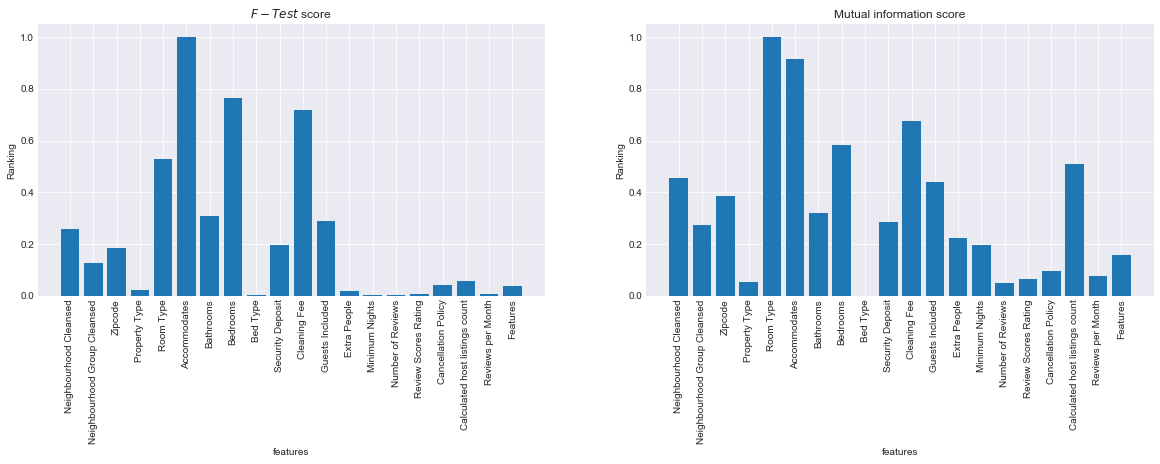

In [46]:
from sklearn.feature_selection import f_regression, mutual_info_regression

y = y_train     # nos quedamos con la 1ª columna, price
X = X_train      # nos quedamos con el resto

#feature_names = house_data.columns[1:]


# do calculations
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-Test$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

### Métodos embedded

Datos entrenamiento:  (10491, 20)
Datos test:  (2641, 20)
best mean cross-validation score: -1445.883
best parameters: {'alpha': 0.26366508987303583}


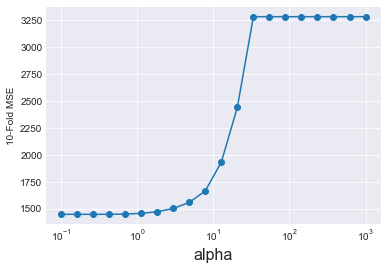

In [47]:
print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

# Ya tenemos los datos de train y test NORMALIZADOS
# XtrainScaled y XtestScaled

# utilizamos la capacidad de Lasso para seleccionar variable
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
cv = 10 #numero de folds
alpha_vector = np.logspace(-1,3,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = cv)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel(f'{cv}-Fold MSE')
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

alpha_optimo = grid.best_params_['alpha']*10
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

print('R^2 (train): %0.3g' % r2_score(y_train,ytrainLasso))
print('R^2 (test) : %0.3g' % r2_score(y_test,ytestLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)


MSE Modelo Lasso (train): 1.48e+03
MSE Modelo Lasso (test) : 1.1e+03
RMSE Modelo Lasso (train): 38.5
RMSE Modelo Lasso (test) : 33.1
R^2 (train): 0.549
R^2 (test) : 0.577
Neighbourhood Cleansed 7.351553050637737
Neighbourhood Group Cleansed 0.0
Zipcode 0.4160617781511535
Property Type 0.0
Room Type 10.32721661310521
Accommodates 10.449907983755393
Bathrooms 5.255143313595277
Bedrooms 10.141630187418338
Bed Type 0.0
Security Deposit 0.7034433071973597
Cleaning Fee 14.854439079431584
Guests Included 0.0
Extra People -0.0
Minimum Nights -0.0
Number of Reviews -0.0
Review Scores Rating 1.9366758191880922
Cancellation Policy -0.0
Calculated host listings count 0.0
Reviews per Month -0.8228340409103105
Features 0.0


Ajustando $\alpha$ podemos obtener un modelo con más o menos overfitting. Podemos multiplicar por 10 o por 100 para que se nos descarten más variables y de esas forma simplificar el modelo. Con el ajuste actual las principales variables con las que nos deberiamos quedar son:

In [49]:
for f,wi in zip(feature_names,w):
    if wi > 1:
        print(f,wi)

Neighbourhood Cleansed 7.351553050637737
Room Type 10.32721661310521
Accommodates 10.449907983755393
Bathrooms 5.255143313595277
Bedrooms 10.141630187418338
Cleaning Fee 14.854439079431584
Review Scores Rating 1.9366758191880922


### Regresión lineal con regularización Ridge


Datos entrenamiento:  (10491, 20)
Datos test:  (2641, 20)
best mean cross-validation score: -1447.352
best parameters: {'alpha': 146.7799267622069}


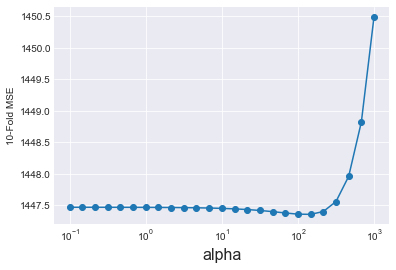

In [50]:
print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

# Ya tenemos los datos de train y test NORMALIZADOS
# XtrainScaled y XtestScaled

# utilizamos la capacidad de Lasso para seleccionar variable
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
cv = 10 #numero de folds
alpha_vector = np.logspace(-1,3,25)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Ridge(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = cv)
#grid.fit(XtrainScaled, y_train)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel(f'{cv}-Fold MSE')
#plt.ylim((0, 1))
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

alpha_optimo = grid.best_params_['alpha']*10
ridge = Ridge(alpha = alpha_optimo).fit(XtrainScaled,y_train)
#ridge = Ridge(alpha = alpha_optimo).fit(X_train,y_train)

ytrainRidge = ridge.predict(XtrainScaled)
ytestRidge  = ridge.predict(XtestScaled)
#ytrainRidge = ridge.predict(X_train)
#ytestRidge  = ridge.predict(X_test)
mseTrainModelRidge = mean_squared_error(y_train,ytrainRidge)
mseTestModelRidge = mean_squared_error(y_test,ytestRidge)

print('MSE Modelo Ridge (train): %0.3g' % mseTrainModelRidge)
print('MSE Modelo Ridge (test) : %0.3g' % mseTestModelRidge)

print('RMSE Modelo Ridge (train): %0.3g' % np.sqrt(mseTrainModelRidge))
print('RMSE Modelo Ridge (test) : %0.3g' % np.sqrt(mseTestModelRidge))

print('R^2 (train): %0.3g' % r2_score(y_train,ytrainRidge))
print('R^2 (test) : %0.3g' % r2_score(y_test,ytestRidge))


w = ridge.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Ridge (train): 1.44e+03
MSE Modelo Ridge (test) : 1.07e+03
RMSE Modelo Ridge (train): 37.9
RMSE Modelo Ridge (test) : 32.7
R^2 (train): 0.562
R^2 (test) : 0.587
Neighbourhood Cleansed 6.736569785215575
Neighbourhood Group Cleansed 0.8612359815192935
Zipcode 2.5438096450619643
Property Type 0.24348873688109587
Room Type 10.708590129612036
Accommodates 10.518134410480371
Bathrooms 6.395822333248122
Bedrooms 9.907241750898816
Bed Type 0.33592809164509346
Security Deposit 2.6050515625407535
Cleaning Fee 13.7500187570635
Guests Included 2.3862481482216604
Extra People -2.716617391956106
Minimum Nights -0.4327268777339978
Number of Reviews -1.4876308759870478
Review Scores Rating 3.846214007364738
Cancellation Policy -1.182831439331672
Calculated host listings count 0.19101718851153274
Reviews per Month -2.6600055277550254
Features 0.8353281690441742


### Arbol de decisión

En este caso no necesita escalar variables de modo que utilizaremos los datasets sin escalado.

best mean cross-validation score: 0.522
best parameters: {'max_depth': 6}


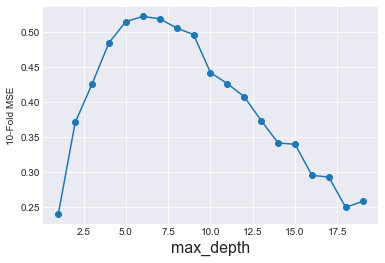

In [52]:
from sklearn.tree import DecisionTreeRegressor

maxDepth = range(1,20)
cv = 10
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = cv)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel(f'{cv}-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [53]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Score Train: ",treeModel.score(X_train,y_train))
print("Score Test: ",treeModel.score(X_test,y_test))

Score Train:  0.6462089701463172
Score Test:  0.5444772812947958


Los resultados obtenidos fueron:  
Train: 0.6462 Test: 0.5444

> Diría que son unos resultados bastante malos. En este caso parece que este modelo no se ajusta al objetivo, ya ni en training tenemos buenos resultados. Parece que estamos en un caso de underfitting.

### Random Forest
En este caso no necesita escalar variables de modo que utilizaremos los datasets sin escalado.

best mean cross-validation score: 0.661
best parameters: {'max_depth': 14}


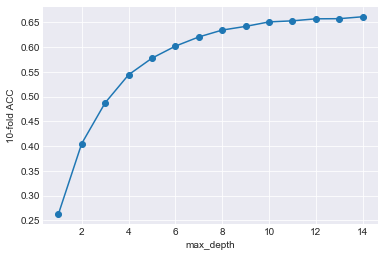

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

cv = 10

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=cv, n_jobs=4) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel(f'{cv}-fold ACC')

plt.show()

In [55]:
maxDepthOptimo = grid.best_params_['max_depth']
rfModel = RandomForestRegressor(max_depth=14,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Score Train: ",rfModel.score(X_train,y_train))
print("Score Test: ",rfModel.score(X_test,y_test))

Score Train:  0.8919451091786115
Score Test:  0.6674539653581394


Los resultados obtenidos fueron:  
Train: 0.8919 Test: 0.6674

> Aumentando la profundidad solamente conseguimos mejorar Train, pero claramente estamos creando un modelo complejo con overfitting y con una mala generalización.

En los algoritmos basados en árboles podemos medir la importancia de las variables

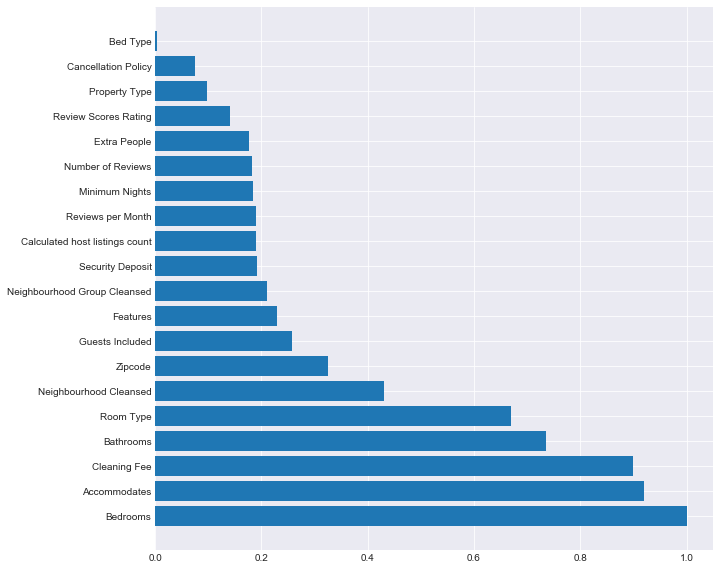

In [56]:
importances = rfModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

### Boosted Trees

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

cv = 10

Niterations = [200, 250, 500,1000] 
learningRate = [0.1,0.05, 0.01]
# mantenemos max_depth estático: max_depth=3,5

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=5), param_grid=param_grid, cv = cv, n_jobs=4)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.644
best parameters: {'learning_rate': 0.01, 'n_estimators': 1000}


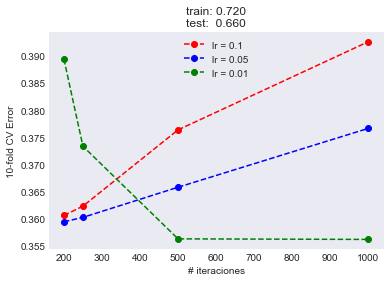

In [58]:
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lRateOptimo, n_estimators=nEstimatorsOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel(f'{cv}-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

Los resultados obtenidos fueron:  
Train: 0.729 Test: 0.666  

Importancia y dependencias de las varibles predictoras

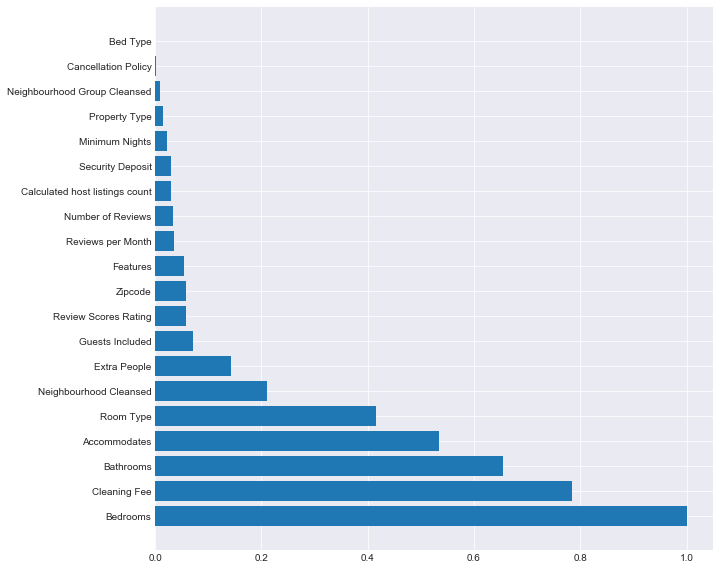

In [59]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

### SVM (Support Vector Machine)

En este algoritmo es importante el escalado de las variables, de modo que se volverá a usar los datasets escalados.

In [ ]:
from sklearn.svm import SVR

cv = 10

array_C = np.logspace(-2, 2, 10)
array_gamma = np.logspace(-5, 1, 8)

param_grid = {'C': array_C, 'gamma':array_gamma}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = cv, verbose=1, n_jobs=4)
grid.fit(XtrainScaled, y_train)

In [ ]:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(XtrainScaled,y_train)
print('Train: %0.2f'%svmModel.score(XtrainScaled,y_train))
print('Test: %0.2f'%svmModel.score(XtestScaled,y_test))

Los resultados obtenidos fueron:  
Train: 0.61 Test: 0.64

En este caso no puedo hacer muchas pruebas debido al tiempo de computo elevado de este modelo.

## 5. Resultados y conclusiones

Hemos ejecutado varios modelos de regresión de ML, con el objetivo de predir los precios de alquiler de _Airbnb_. Los modelos uitlizados han sido:

| Modelo | Train | Test|
|---|---|---|
|Regression lineal con regulación (Ridge)|$R^2$:0.562 RMSE:38.5|$R^2$:0.587 RMSE:33.1|
|Regression lineal con regulación (Lasso)|$R^2$:0.549 RMSE:38.5|$R^2$:0.577 RMSE:33.1|
|Arboles de decisión|0.6462|0.5444|
|Random Forest|0.8919|0.6674|
|Boosted Trees|0.729|0.666|
|Support Machine Vector| 0.61|0.64|

Si nos fijamos en el coeficiente de determinación _$R^2$_ parece que el modelo que mejor se ha comportado es Random Forest, pero de todas formas los resultados son malos, ya que los resultados en test no son buenos. En algunos casos he intentado aumentar la complejidad del modulo, por ejmplo con una mayor profundidad en el caso de los arboles, pero solamente ha servido para mejorar training, provocando overfitting en el sistema y lo que nos llevaría a una mala generalización.


### Próximos pasos
Los resultados de test no son buenos, de modo que deberiamos probar a:
* Variar la cantidad de variables de nuestro modelo o elegir otras.
* También se podrían crear nuevas variables que sean relevantes para nuestro modeloo combinación de varias.
* Hacer alguna transformación de alguna de las columnas. Como se hemos visto en algun ejemplo, la variable objetivo __Price__ esta balanceada hacia la izquierda y quizá con una transformación logaritmica puede hacer que los resultados sean más óptimos.
* En el caso de los SVM ha tenido unos resultado bastante malos, se podría probar con otro tipo de kernel (lineal, poly,...) para ver si se ajustan mejor a nuestro problema.